In [2]:
from fastai.text import *

In [27]:
path = Path.cwd()
fname = 'arisbotle_data.txt'

In [7]:
data_lm = TextLMDataBunch.from_folder(path, fname)

In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


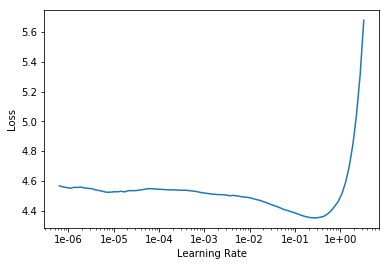

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
# Train final layer
learn.fit_one_cycle(3, 1e-1)

In [11]:
learn.predict("It has been said", n_words=40)

'It has been said that Callippides is not now natural to the Plot of Is Margites , though some end is an appeal , this make us guilty of refer to the people and their actions ; and , as'

In [13]:
# Unfreeze last two layers
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


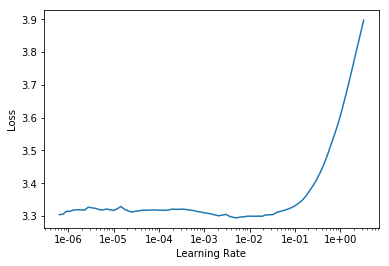

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(3, slice(1e-5, 3e-3))

In [16]:
learn.predict("It has been said", n_words=40)

"It has been said that some of these create laws ; for of necessity Homer was to cultivate Homer 's constitution when he and the neighbouring cities were enrolled in his private property , and these people were obliged to employ him"

In [28]:
# Train entire model
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


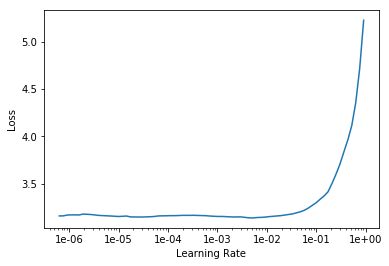

In [17]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10, slice(1e-5, 3e-3))

In [23]:
learn.predict("It has been said", n_words=40)

'It has been said , then , that the doubtful who founded a fortune society is of most consequence for similar property ; and according to this plan is the difference between the different sorts of citizens ; for is actually what admits a'

In [29]:
learn.metrics = [accuracy_thresh]

In [30]:
learn.fit_one_cycle(4, slice(1e-5, 3e-3))

In [31]:
learn.predict("It has been said", n_words=40)

'It has been said , that the deeds of sorts of governments and the exigencies of the state is just a pre - eminence , and that the Thessalians well regulated by the laws to be treated as well as it said ,'

In [32]:
learn.export('export.pkl')